**Importing modules**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

**create a signal**

In [ ]:
srate=256 #Hz
t=np.arange(0,3,1/srate)
pnts=len(t)

x=np.sin(2*np.pi*2*t)#sin(2*pi*2t)

noise=5*np.random.rand(pnts)

NoisySignal=x+noise


**plotting signal**

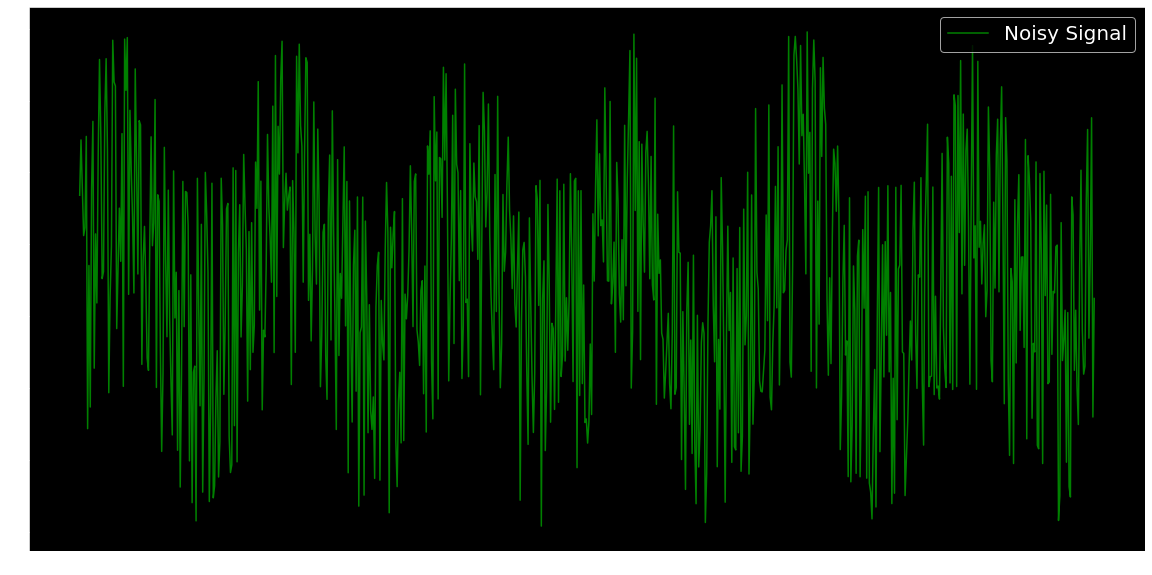

In [ ]:
plt.figure(figsize=(20,10))
style.use('dark_background')

plt.plot(t,NoisySignal,'g',label='Noisy Signal')
plt.legend(fontsize=20)
plt.show()

In [ ]:
N = 30 

In [ ]:
S_NS = NoisySignal.shape[0]
print(S_NS)

768


In [ ]:
#Initialize denoised signal...
filt_sig = np.zeros(NoisySignal.shape[0])


In [ ]:
# Applying moving average filter...

for i in range(0, NoisySignal.shape[0]):
  filt_sig[i] = np.mean(NoisySignal[i:(2*N+1)+i])


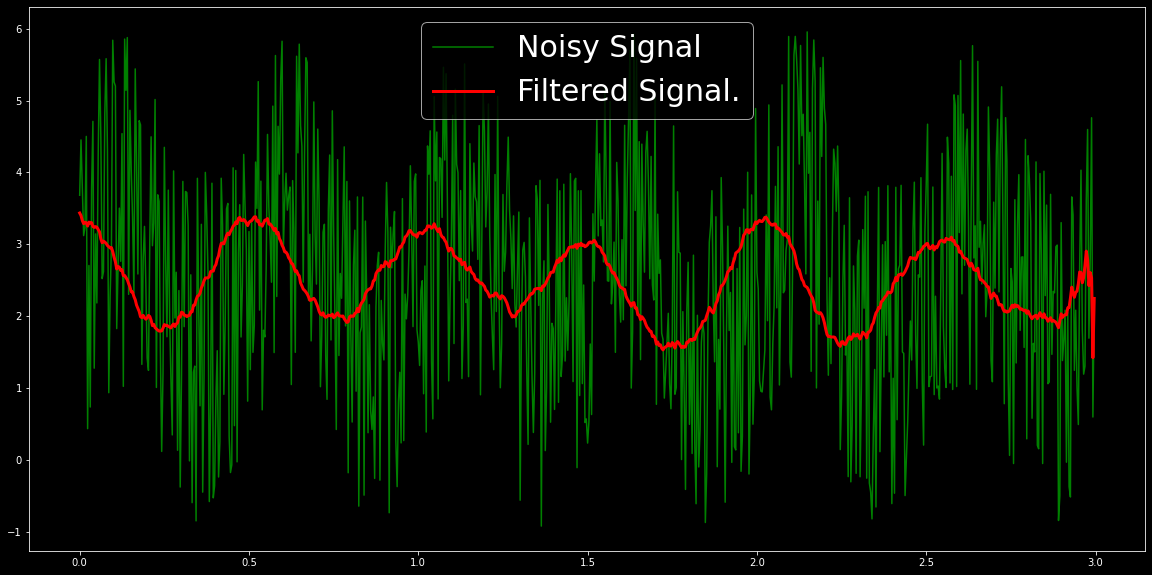

In [ ]:
plt.figure(figsize=(20,10)) 
style.use('dark_background')

plt.plot(t, NoisySignal, 'g-', label='Noisy Signal')
plt.plot(t, filt_sig, 'r-', linewidth=3, label='Filtered Signal.')

plt.legend(fontsize=30)
plt.show()



In [ ]:
# Create a signal...
srate = 512 # Hz
t = np.arange(0,3,1/srate)
pnts = len(t)

x = np.sin(2*np.pi*2*t)

noise = 5*np.random.randn(pnts)


NoisySignal = x+noise


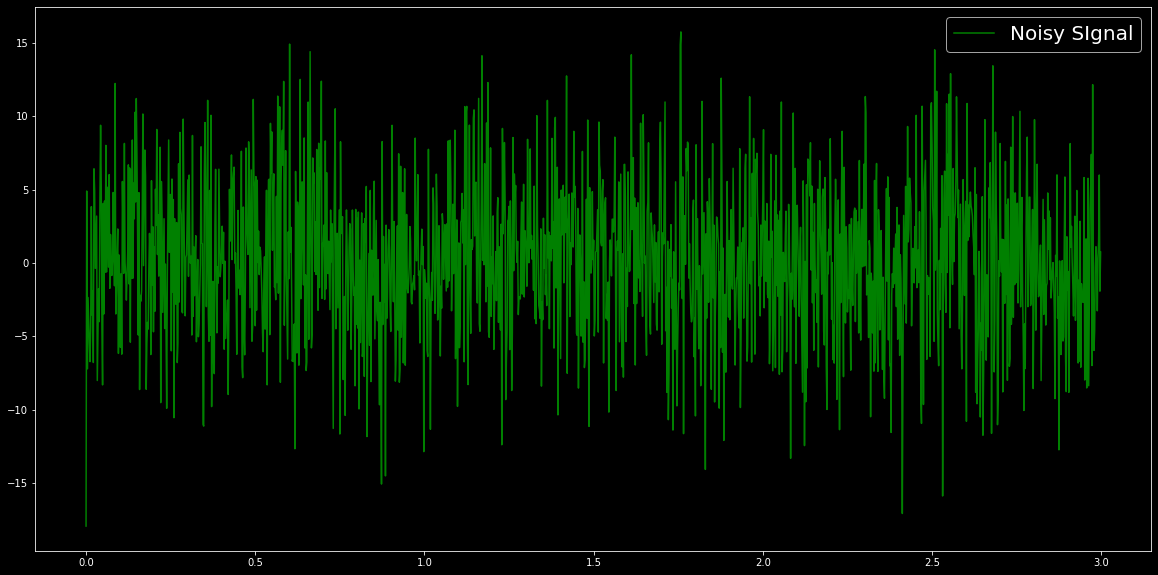

In [ ]:
plt.figure(figsize=(20,10))
style.use('dark_background')

plt.plot(t, NoisySignal, 'g', label='Noisy SIgnal')
plt.legend(fontsize=20)
plt.show()

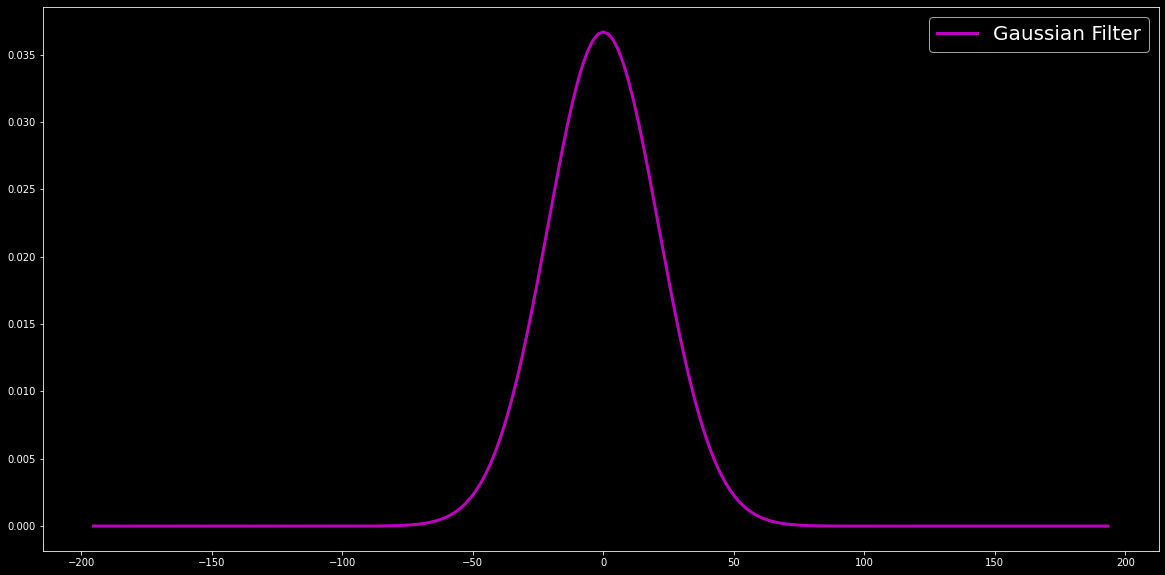

In [ ]:
# Generating Gaussian Kernel/Filter..
 
N = 100
fwhm = 50  # ms # full-width half-maximum
Gtime = 1000*np.arange(-N,N)/srate
Gfilter = np.exp( -(4*np.log(2)*Gtime**2)/fwhm**2  )
Gfilter = Gfilter/np.sum(Gfilter)  # Normalizing the Gaussian Filter.

# Plotting Gaussian Filter.
plt.figure(figsize=(20,10))
plt.plot(Gtime, Gfilter, 'm', linewidth=3, label='Gaussian Filter')

plt.legend(fontsize=20)
plt.show()

In [ ]:
# Zero Padding...to avoid edge effect.
sig_4_filter = np.concatenate((np.zeros(N), NoisySignal, np.zeros(N)), axis=0   )
K = len(NoisySignal)
timeindex = np.concatenate( (np.arange(-N,0), np.arange(0,K), np.arange(K,K+N)), axis=0 )
time_4_filter = timeindex/srate

In [ ]:
print(len(timeindex))
print(len(sig_4_filter))

1736
1736


In [ ]:
# Initialize the filtered signal..
Gfilt_sig = np.zeros(sig_4_filter.shape[0])

# Applying Gaussian Filter...
for i in range(0, NoisySignal.shape[0]):
  Gfilt_sig[i] = np.sum(sig_4_filter[i:2*N+i]*Gfilter)
  

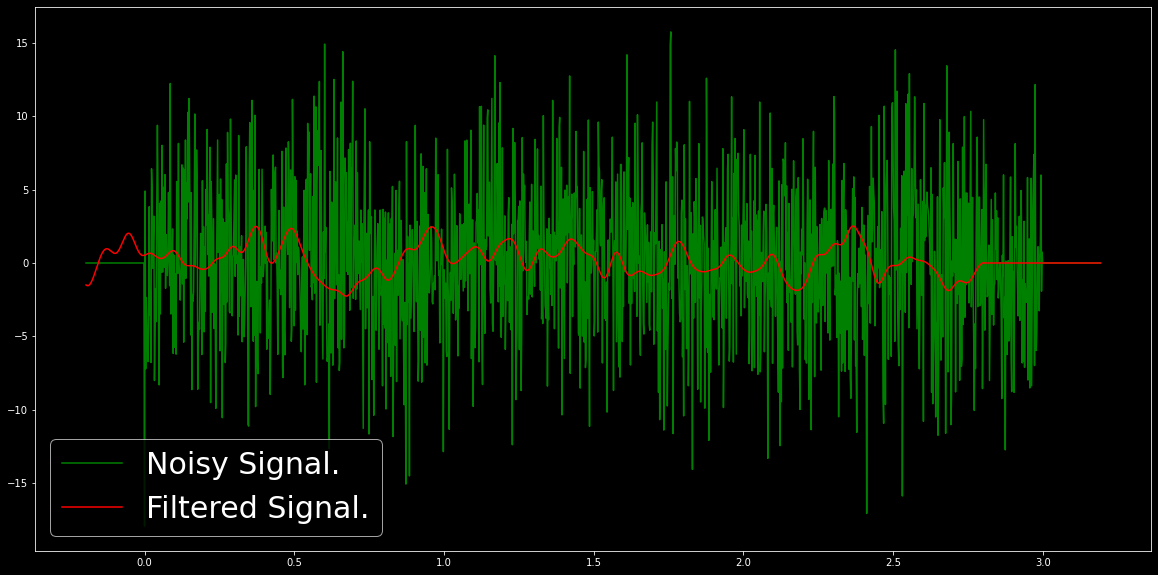

In [ ]:
#Plotting Filtered Signal...
plt.figure(figsize=(20,10))
style.use('dark_background')


plt.plot(time_4_filter, sig_4_filter, 'g-', label='Noisy Signal.')
plt.plot(time_4_filter, Gfilt_sig, 'r-', label='Filtered Signal.')

plt.legend(fontsize=30)
plt.show()